In [3]:
import json
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date, datetime, timedelta
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.by import By

In [166]:
#Tesla - Annual Revenue
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/income-statement?freq=A"
driver = webdriver.Chrome('/Users/kaholi3/Downloads/chromedriver')
driver.set_window_size(1824,1026)
driver.get(url)

table = driver.find_elements(By.ID,"jqxgrid")[0]
table.location_once_scrolled_into_view

bar = driver.find_elements(By.ID,"jqxScrollThumbhorizontalScrollBarjqxgrid")[0]
action = ActionChains(driver)
action.click_and_hold(bar).move_by_offset(380,0).release().perform()

soup = BeautifulSoup(driver.page_source, "html.parser")
yearly = soup.find_all(style="text-overflow: ellipsis; cursor: default;")[2:]
revenue = soup.find_all(style="font-weight:bold; text-align:right; margin-top:5px; margin-right:4px;")[:len(yearly)]
driver.close()

d_yearly = {"Year": (int(yearly[i].text[:4]) for i in range(len(yearly))), "Annual Revenue (Millions of US $)": (float(revenue[i].text.replace("$","").replace(",","")) for i in range(len(revenue)))}
df_yearly = pd.DataFrame(d_yearly)
df_Tesla_yearly = df_yearly[::-1]

/var/folders/bn/mxb8bm711w79zvytqtgfmjfr0000gn/T/ipykernel_1270/3580705099.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/kaholi3/Downloads/chromedriver')


In [168]:
df_yearly

,Year,Annual Revenue (Millions of US $)
0,2021,53823.000
1,2020,31536.000
2,2019,24578.000
3,2018,21461.000
4,2017,11759.000
5,2016,7000.132
6,2015,4046.025
7,2014,3198.356
8,2013,2013.496
9,2012,413.256


In [8]:
#Tesla - Quarterly Revenue
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/income-statement?freq=Q"
driver = webdriver.Chrome('/Users/kaholi3/Downloads/chromedriver')
driver.set_window_size(1824,1026)
driver.get(url)

table = driver.find_elements(By.ID,"jqxgrid")[0]
table.location_once_scrolled_into_view

soup = BeautifulSoup(driver.page_source, "html.parser")
temp_quarterly = soup.find_all(style="text-overflow: ellipsis; cursor: default;")[2:]
quarterly = [i.text for i in temp_quarterly]
temp_revenue = soup.find_all(style="font-weight:bold; text-align:right; margin-top:5px; margin-right:4px;")[:len(quarterly)]
revenue = [i.text for i in temp_revenue]

bar = driver.find_elements(By.ID,"jqxScrollThumbhorizontalScrollBarjqxgrid")[0]
action = ActionChains(driver)
for i in range(int((int(quarterly[0][:4])-2008)*4/15)) :
    action.click_and_hold(bar).move_by_offset(380,0).release().perform()
    soup = BeautifulSoup(driver.page_source, "html.parser")
    temp_quarterly = soup.find_all(style="text-overflow: ellipsis; cursor: default;")[2:]
    temp_revenue = soup.find_all(style="font-weight:bold; text-align:right; margin-top:5px; margin-right:4px;")[:len(temp_quarterly)]
    for j in temp_quarterly :
        if j.text in quarterly :
            continue
        else :
            quarterly.append(j.text)
            revenue.append(temp_revenue[temp_quarterly.index(j)].text)
revenue.pop(-1)
revenue.insert(-2,str(round(df_Tesla_yearly["Annual Revenue (Millions of US $)"].iloc[0]-float(revenue[-1].replace("$","").replace(",",""))-float(revenue[-2].replace("$","").replace(",","")),2)))
driver.close()

d_quarterly = {"Quarter": (date(int(quarterly[i][:4]),int(quarterly[i][5:7]),int(quarterly[i][8:])) for i in range(len(quarterly))), "Quarterly Revenue (Millions of US $)": (float(revenue[i].replace("$","").replace(",","")) for i in range(len(revenue)))}
df_quarterly = pd.DataFrame(d_quarterly)
df_Tesla_quarterly = df_quarterly[::-1]

/var/folders/bn/mxb8bm711w79zvytqtgfmjfr0000gn/T/ipykernel_1270/1889070776.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('/Users/kaholi3/Downloads/chromedriver')


In [9]:
df_quarterly

,Quarter,Quarterly Revenue (Millions of US $)
0,2022-09-30,21454.000
1,2022-06-30,16934.000
2,2022-03-31,18756.000
3,2021-12-31,17719.000
4,2021-09-30,13757.000
5,2021-06-30,11958.000
6,2021-03-31,10389.000
7,2020-12-31,10744.000
8,2020-09-30,8771.000
9,2020-06-30,6036.000


In [10]:
#Tesla - Monthly Revenue
d = date(2009,5,1)
ml = []
for i in range(int(len(quarterly)*3)) :
    ml.append(date(int(d.strftime("%Y")),int(d.strftime("%m")),1) - timedelta(days=1))
    if int(ml[-1].strftime("%m"))+2 <=12 :
        d = date(int(ml[-1].strftime("%Y")),int(ml[-1].strftime("%m"))+2,1)
    elif int(ml[-1].strftime("%m"))+2 == 13 :
        d = date(int(ml[-1].strftime("%Y"))+1,1,1)
    else :
        d = date(int(ml[-1].strftime("%Y"))+1,2,1)

mrl = [i/3 for i in df_Tesla_quarterly["Quarterly Revenue (Millions of US $)"] for j in range(3)]

d_monthly = {"Month": ml, "Monthly Revenue (Millions of US $)": mrl}
df_Tesla_monthly = pd.DataFrame(d_monthly)

In [12]:
df_Tesla_monthly

,Month,Monthly Revenue (Millions of US $)
0,2009-04-30,8.981667
1,2009-05-31,8.981667
2,2009-06-30,8.981667
3,2009-07-31,15.175667
4,2009-08-31,15.175667
...,...,...
157,2022-05-31,5644.666667
158,2022-06-30,5644.666667
159,2022-07-31,7151.333333
160,2022-08-31,7151.333333


In [13]:
#IXIC - Daily
today = int(datetime(int(date.today().strftime("%Y")),int(date.today().strftime("%m")),int(date.today().strftime(f"%d"))+1).timestamp())

url = (f"https://query1.finance.yahoo.com/v8/finance/chart/%5EIXIC?symbol=%5EIXIC&period1=0&period2={today}&useYfid=true&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=c0iNuYsQEnn&corsDomain=finance.yahoo.com")
header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
res = requests.get(url,headers=header)
content = json.loads(res.text)

date1 = content['chart']['result'][0]['timestamp']
date2 = [date.fromtimestamp(date1[j]).strftime(f"%Y-%m-%d") for j in range(len(date1))]
close = content['chart']['result'][0]['indicators']['quote'][0]['close']

d1 = {"date": date2, "close": close}
df_IXIC_daily = pd.DataFrame(d1)

In [14]:
df_IXIC_daily

,date,close
0,1971-02-05,100.000000
1,1971-02-08,100.839996
2,1971-02-09,100.760002
3,1971-02-10,100.690002
4,1971-02-11,101.449997
...,...,...
13051,2022-11-03,10342.940430
13052,2022-11-04,10475.250000
13053,2022-11-07,10564.519531
13054,2022-11-08,10616.200195


In [15]:
#IXIC - Monthly
d = date(int(df_IXIC_daily["date"].iloc[0][:4]),int(df_IXIC_daily["date"].iloc[0][5:7])+1,1)
ml = []

if int(df_IXIC_daily["date"].iloc[-1][5:7]) > 2 :
    ml_len = (int(df_IXIC_daily["date"].iloc[-1][:4])-int(df_IXIC_daily["date"].iloc[0][:4]))*12+(int(df_IXIC_daily["date"].iloc[-1][5:7])-int(df_IXIC_daily["date"].iloc[0][5:7]))
elif int(df_IXIC_daily["date"].iloc[-1][5:7]) == 1 :
    ml_len = (int(df_IXIC_daily["date"].iloc[-1][:4])-int(df_IXIC_daily["date"].iloc[0][:4]))*12+11
else :
    ml_len = (int(df_IXIC_daily["date"].iloc[-1][:4])-int(df_IXIC_daily["date"].iloc[0][:4])+1)*12

for i in range(ml_len) :
    ml.append(date(int(d.strftime("%Y")),int(d.strftime("%m")),1) - timedelta(days=1))
    if int(ml[-1].strftime("%m"))+2 <=12 :
        d = date(int(ml[-1].strftime("%Y")),int(ml[-1].strftime("%m"))+2,1)
    elif int(ml[-1].strftime("%m"))+2 == 13 :
        d = date(int(ml[-1].strftime("%Y"))+1,1,1)
    else :
        d = date(int(ml[-1].strftime("%Y"))+1,2,1)

cml = []
for i in range(len(ml)):
    cmm = df_IXIC_daily[(df_IXIC_daily["date"]>=str(date(int(ml[i].strftime("%Y")),int(ml[i].strftime("%m")),1)))&(df_IXIC_daily["date"]<=str(ml[i]))]
    cml.append(sum(cmm["close"])/len(cmm))

d2 = {"month": ml, "close means": cml}
df_IXIC_monthly = pd.DataFrame(d2)

In [16]:
df_IXIC_monthly

,month,close means
0,1971-02-28,100.963333
1,1971-03-31,104.448260
2,1971-04-30,109.555238
3,1971-05-31,109.570500
4,1971-06-30,108.567728
...,...,...
616,2022-06-30,11418.919085
617,2022-07-31,11622.631543
618,2022-08-31,12570.260403
619,2022-09-30,11402.849981


In [17]:
#IXIC - Quarterly
if len(df_IXIC_monthly)%3 == 2 :
    ql = df_IXIC_monthly["month"][1::3]
else :
    ql = np.append(np.array(df_IXIC_monthly["month"][1::3]),np.array(df_IXIC_monthly["month"].iloc[-1]))


cml_fill_1 = np.append(np.array([0]), np.array(df_IXIC_monthly["close means"]))

if len(cml_fill_1)%3 == 2 :
    cml_fill_2 = np.append(cml_fill_1, np.array([0]))
elif len(cml_fill_1)%3 == 1 :
    cml_fill_2 = np.append(cml_fill_1, np.array([0,0]))
else :
    pass

cml_fill_3 = np.split(cml_fill_2, len(cml_fill_2)/3)
cml = [(cml_fill_3[i].sum()/np.count_nonzero(cml_fill_3[i])) for i in range(len(cml_fill_3))]

d3 = {"quarter": ql, "close means": cml}
df_IXIC_quarterly = pd.DataFrame(d3)

In [18]:
df_IXIC_quarterly

,quarter,close means
0,1971-03-31,102.705797
1,1971-06-30,109.231155
2,1971-09-30,108.446775
3,1971-12-31,107.266898
4,1972-03-31,122.252005
...,...,...
203,2021-12-31,15389.458983
204,2022-03-31,14017.789618
205,2022-06-30,12214.270554
206,2022-09-30,11865.247309


In [19]:
#IXIC - Yearly
yl = [i for i in range(int(df_IXIC_daily["date"].iloc[0][:4]), int(df_IXIC_daily["date"].iloc[-1][:4]))]

cml = []
for i in yl :
    cmr = df_IXIC_daily[(df_IXIC_daily["date"]>=f"{i}-01-01")&(df_IXIC_daily["date"]<=f"{i}-12-31")]["close"]
    cml.append(cmr.sum()/len(cmr))

d4 = {"year": yl, "close means": cml}
df_IXIC_yearly = pd.DataFrame(d4)

In [20]:
df_IXIC_yearly

,year,close means
0,1971,107.439301
1,1972,128.526613
2,1973,109.952857
3,1974,76.286877
4,1975,77.203952
5,1976,89.898103
6,1977,98.710119
7,1978,117.525119
8,1979,136.574545
9,1980,168.608379


In [21]:
#CL - Daily
today = int(datetime(int(date.today().strftime("%Y")),int(date.today().strftime("%m")),int(date.today().strftime(f"%d"))+1).timestamp())

url = (f"https://query1.finance.yahoo.com/v8/finance/chart/CL=F?symbol=CL%3DF&period1=0&period2={today}&useYfid=true&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US&crumb=c0iNuYsQEnn&corsDomain=finance.yahoo.com")
header = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
res = requests.get(url,headers=header)
content = json.loads(res.text)

date1 = content['chart']['result'][0]['timestamp']
date2 = [date.fromtimestamp(date1[j]).strftime(f"%Y-%m-%d") for j in range(len(date1))]
close = content['chart']['result'][0]['indicators']['quote'][0]['close']

d1 = {"date": date2, "close": close}
df_CL_daily = pd.DataFrame(d1).dropna()

In [22]:
df_CL_daily

,date,close
0,2000-08-23,32.049999
1,2000-08-24,31.629999
2,2000-08-25,32.049999
3,2000-08-28,32.869999
4,2000-08-29,32.720001
...,...,...
5656,2022-11-04,92.610001
5657,2022-11-07,91.790001
5658,2022-11-08,88.910004
5659,2022-11-09,85.830002


In [23]:
#CL - Monthly
d = date(int(df_CL_daily["date"].iloc[0][:4]),int(df_CL_daily["date"].iloc[0][5:7])+1,1)
ml = []

if int(df_CL_daily["date"].iloc[-1][5:7]) > 2 :
    ml_len = (int(df_CL_daily["date"].iloc[-1][:4])-int(df_CL_daily["date"].iloc[0][:4]))*12+(int(df_CL_daily["date"].iloc[-1][5:7])-int(df_CL_daily["date"].iloc[0][5:7]))
elif int(df_CL_daily["date"].iloc[-1][5:7]) == 1 :
    ml_len = (int(df_CL_daily["date"].iloc[-1][:4])-int(df_CL_daily["date"].iloc[0][:4]))*12+11
else :
    ml_len = (int(df_CL_daily["date"].iloc[-1][:4])-int(df_CL_daily["date"].iloc[0][:4])+1)*12

for i in range(ml_len) :
    ml.append(date(int(d.strftime("%Y")),int(d.strftime("%m")),1) - timedelta(days=1))
    if int(ml[-1].strftime("%m"))+2 <=12 :
        d = date(int(ml[-1].strftime("%Y")),int(ml[-1].strftime("%m"))+2,1)
    elif int(ml[-1].strftime("%m"))+2 == 13 :
        d = date(int(ml[-1].strftime("%Y"))+1,1,1)
    else :
        d = date(int(ml[-1].strftime("%Y"))+1,2,1)

cml = []
for i in range(len(ml)):
    cmm = df_CL_daily[(df_CL_daily["date"]>=str(date(int(ml[i].strftime("%Y")),int(ml[i].strftime("%m")),1)))&(df_CL_daily["date"]<=str(ml[i]))]
    cml.append(sum(cmm["close"])/len(cmm))

d2 = {"month": ml, "close means": cml}
df_CL_monthly = pd.DataFrame(d2)

In [24]:
df_CL_monthly

,month,close means
0,2000-08-31,32.545714
1,2000-09-30,33.871000
2,2000-10-31,32.973182
3,2000-11-30,34.264500
4,2000-12-31,28.355000
...,...,...
262,2022-06-30,114.154091
263,2022-07-31,99.384500
264,2022-08-31,91.482609
265,2022-09-30,83.801905


In [25]:
#CL - Quarterly
if len(df_CL_monthly)%3 == 2 :
    ql = df_CL_monthly["month"][1::3]
else :
    ql = np.append(np.array(df_CL_monthly["month"][1::3]),np.array(df_CL_monthly["month"].iloc[-1]))


cml_fill_1 = np.append(np.array([0]), np.array(df_CL_monthly["close means"]))

if len(cml_fill_1)%3 == 2 :
    cml_fill_2 = np.append(cml_fill_1, np.array([0]))
elif len(cml_fill_1)%3 == 1 :
    cml_fill_2 = np.append(cml_fill_1, np.array([0,0]))
else :
    pass

cml_fill_3 = np.split(cml_fill_2, len(cml_fill_2)/3)
cml = [(cml_fill_3[i].sum()/np.count_nonzero(cml_fill_3[i])) for i in range(len(cml_fill_3))]

d3 = {"quarter": ql, "close means": cml}
df_CL_quarterly = pd.DataFrame(d3)

In [26]:
df_CL_quarterly

,quarter,close means
0,2000-09-30,33.208357
1,2000-12-31,31.864227
2,2001-03-31,28.724686
3,2001-06-30,27.965562
4,2001-09-30,26.566430
...,...,...
85,2021-12-31,77.179438
86,2022-03-31,94.290040
87,2022-06-30,108.351371
88,2022-09-30,91.556338


In [27]:
#CL - Yearly
yl = [i for i in range(int(df_CL_daily["date"].iloc[0][:4]), int(df_CL_daily["date"].iloc[-1][:4]))]

cml = []
for i in yl :
    cmr = df_CL_daily[(df_CL_daily["date"]>=f"{i}-01-01")&(df_CL_daily["date"]<=f"{i}-12-31")]["close"]
    cml.append(cmr.sum()/len(cmr))

d4 = {"year": yl, "close means": cml}
df_CL_yearly = pd.DataFrame(d4)

In [28]:
df_CL_yearly

,year,close means
0,2000,32.393708
1,2001,25.960405
2,2002,26.150440
3,2003,30.994400
4,2004,41.469076
5,2005,56.704502
6,2006,66.254560
7,2007,72.364524
8,2008,99.751541
9,2009,62.094088


In [29]:
#Household Income - Yearly
url = "https://www.deptofnumbers.com/income/us/"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
yl = [int(i.text) for i in soup.find(id="table_588047").find_all("td", class_="col1")]
il = [int(i.text.replace("$","").replace(",","")) for i in soup.find(id="table_588047").find_all("td", class_="rstat")]
d = {"year": yl, "US$": il}
df_HI = pd.DataFrame(d)[::-1]

In [30]:
df_HI

,year,US$
16,2005,64310
15,2006,65267
14,2007,66465
13,2008,65632
12,2009,63573
11,2010,62323
10,2011,60969
9,2012,60732
8,2013,60869
7,2014,61468


In [31]:
#Family Income - Yearly
url = "https://www.deptofnumbers.com/income/us/"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
yl = [int(i.text) for i in soup.find(id="table_839916").find_all("td", class_="col1")]
il = [int(i.text.replace("$","").replace(",","")) for i in soup.find(id="table_839916").find_all("td", class_="rstat")]
d = {"year": yl, "US$": il}
df_FI = pd.DataFrame(d)[::-1]

In [32]:
df_FI

,year,US$
16,2005,77647
15,2006,78838
14,2007,80131
13,2008,79933
12,2009,77322
11,2010,75477
10,2011,74192
9,2012,73920
8,2013,74593
7,2014,75505


In [33]:
#Capita Income - Yearly
url = "https://www.deptofnumbers.com/income/us/"
soup = BeautifulSoup(requests.get(url).text, "html.parser")
yl = [int(i.text) for i in soup.find(id="table_49011").find_all("td", class_="col1")]
il = [int(i.text.replace("$","").replace(",","")) for i in soup.find(id="table_49011").find_all("td", class_="rstat")]
d = {"year": yl, "US$": il}
df_CI = pd.DataFrame(d)[::-1]

In [34]:
df_CI

,year,US$
16,2005,34817
15,2006,34036
14,2007,34959
13,2008,34802
12,2009,33430
11,2010,32452
10,2011,32243
9,2012,32297
8,2013,32833
7,2014,33094


In [35]:
#Vehicle Sales - Yearly, Quarterly, Monthly
url = "https://www.goodcarbadcar.net/usa-auto-industry-total-sales-figures/"
soup = BeautifulSoup(requests.get(url).text, "html.parser")

l = soup.find("table", id="table_3").find_all("td", style="")

yl = [int(i.text) for i in l[0::13]]
ml = []
for i in yl :
    for j in range(2,13) :
        ml.append(date(i,j,1) - timedelta(days=1))
    ml.append(date(i+1,1,1) - timedelta(days=1))

msl = [int(l[i].text.replace(",","")) for i in range(len(l)) if i%13 != 0]
qsl = [np.array_split(msl,len(msl)/3)[i].sum() for i in range(int(np.count_nonzero(msl)/3))]
ysl = [np.array_split(msl,len(msl)/12)[i].sum() for i in range(int(len(msl)/12))]
ql = [ml[2::3][i] for i in range(int(np.count_nonzero(msl)/3))]

dy = {"year": yl, "Sales": ysl}
df_VS_yearly = pd.DataFrame(dy)
dq = {"quarter": ql, "Sales": qsl}
df_VS_quarterly = pd.DataFrame(dq)
dm = {"month": ml, "Sales": msl}
df_VS_monthly = pd.DataFrame(dm)

In [36]:
df_VS_monthly

,month,Sales
0,2005-01-31,1052224
1,2005-02-28,1244753
2,2005-03-31,1564938
3,2005-04-30,1493837
4,2005-05-31,1488171
...,...,...
211,2022-08-31,1136045
212,2022-09-30,1075495
213,2022-10-31,624812
214,2022-11-30,0


In [176]:
#Final yearly data frame

kl = ["Year", "Tesla Annual Revenue (Millions)", "IXIC", "CL", "Household Income", "Family Income", "Capita Income", "Vehicle Sales"]

d1 = df_Tesla_yearly["Year"].reset_index(drop=True)
d2 = df_Tesla_yearly["Annual Revenue (Millions of US $)"].reset_index(drop=True)
d3 = df_IXIC_yearly[df_IXIC_yearly["year"]>=2009]["close means"].reset_index(drop=True)
d4 = df_CL_yearly[df_CL_yearly["year"]>=2009]["close means"].reset_index(drop=True)
d5 = df_HI[df_HI["year"]>=2009]["US$"].reset_index(drop=True)
d6 = df_FI[df_FI["year"]>=2009]["US$"].reset_index(drop=True)
d7 = df_CI[df_CI["year"]>=2009]["US$"].reset_index(drop=True)
d8 = df_VS_yearly[(df_VS_yearly["year"]>=2009)&(df_VS_yearly["year"]<=2021)]["Sales"].reset_index(drop=True)
vl = [d1, d2, d3, d4, d5, d6, d7, d8]

d_yearly = {kl[i]:vl[i] for i in range(len(kl))}
df_yearly = pd.DataFrame(d_yearly)

In [177]:
df_yearly

,Year,Tesla Annual Revenue (Millions),IXIC,CL,Household Income,Family Income,Capita Income,Vehicle Sales
0,2009,111.943,1845.384962,62.094088,63573,77322,33430,10347715
1,2010,116.744,2349.893531,79.609881,62323,75477,32452,11510416
2,2011,204.242,2677.440750,95.114405,60969,74192,32243,12695712
3,2012,413.256,2965.558847,94.213520,60732,73920,32297,15376264
4,2013,2013.496,3541.292188,98.046825,60869,74593,32833,15490245
5,2014,3198.356,4375.103553,92.906786,61468,75505,33094,16424017
6,2015,4046.025,4945.553540,48.761349,63784,78061,34284,17404970
7,2016,7000.132,4987.792947,43.435800,65052,80231,35145,17500719
8,2017,11759.000,6235.298914,50.853267,66687,81669,35807,17212565
9,2018,21461.000,7425.957811,64.947450,66828,82434,36503,17323849


In [126]:
#Final quarterly data frame

kl = ["Quarter", "Tesla Quarterly Revenue (Millions)", "IXIC", "CL", "Vehicle Sales"]

d1 = df_Tesla_quarterly["Quarter"].reset_index(drop=True)
d2 = df_Tesla_quarterly["Quarterly Revenue (Millions of US $)"].reset_index(drop=True)
d3 = df_IXIC_quarterly[(df_IXIC_quarterly["quarter"]>=date(2009,6,30))&(df_IXIC_quarterly["quarter"]<=date(2022,9,30))]["close means"].reset_index(drop=True)
d4 = df_CL_quarterly[(df_CL_quarterly["quarter"]>=date(2009,6,30))&(df_CL_quarterly["quarter"]<=date(2022,9,30))]["close means"].reset_index(drop=True)
d5 = df_VS_quarterly[(df_VS_quarterly["quarter"]>=date(2009,6,30))&(df_VS_quarterly["quarter"]<=date(2022,9,30))]["Sales"].reset_index(drop=True)
vl = [d1, d2, d3, d4, d5]

d_quarterly = {kl[i]:vl[i] for i in range(len(kl))}
df_quarterly = pd.DataFrame(d_quarterly)

In [127]:
df_quarterly

,Quarter,Tesla Quarterly Revenue (Millions),IXIC,CL,Vehicle Sales
0,2009-06-30,26.945,1731.404437,59.619160,2592695
1,2009-09-30,45.527,1985.246703,68.299950,2987326
2,2009-12-31,39.470,2162.327355,76.190606,2588408
3,2010-03-31,20.812,2274.819542,78.715088,2526773
4,2010-06-30,28.405,2343.396185,78.032428,3051409
5,2010-09-30,31.241,2237.967129,76.199415,2992963
6,2010-12-31,36.286,2534.615228,85.174235,2939271
7,2011-03-31,49.030,2741.011148,94.100988,3040925
8,2011-06-30,58.171,2766.636803,102.561268,3245694
9,2011-09-30,57.666,2613.111577,89.763790,3171284


In [41]:
#Final monthly data frame

kl = ["Month", "Tesla Monthly Revenue (Millions)", "IXIC", "CL", "Vehicle Sales"]

d1 = df_Tesla_monthly["Month"].reset_index(drop=True)
d2 = df_Tesla_monthly["Monthly Revenue (Millions of US $)"].reset_index(drop=True)
d3 = df_IXIC_monthly[(df_IXIC_monthly["month"]>=date(2009,4,30))&(df_IXIC_monthly["month"]<=date(2022,9,30))]["close means"].reset_index(drop=True)
d4 = df_CL_monthly[(df_CL_monthly["month"]>=date(2009,4,30))&(df_CL_monthly["month"]<=date(2022,9,30))]["close means"].reset_index(drop=True)
d5 = df_VS_monthly[(df_VS_monthly["month"]>=date(2009,4,30))&(df_VS_monthly["month"]<=date(2022,9,30))]["Sales"].reset_index(drop=True)
vl = [d1, d2, d3, d4, d5]

d_monthly = {kl[i]:vl[i] for i in range(len(kl))}
df_monthly = pd.DataFrame(d_monthly)

In [42]:
df_monthly

,Month,Tesla Monthly Revenue (Millions),IXIC,CL,Vehicle Sales
0,2009-04-30,8.981667,1641.147618,49.949524,822746
1,2009-05-31,8.981667,1726.077496,59.212500,919295
2,2009-06-30,8.981667,1826.988198,69.695455,850654
3,2009-07-31,15.175667,1873.837735,64.293182,991950
4,2009-08-31,15.175667,1997.155244,71.138572,1254982
...,...,...,...,...,...
157,2022-05-31,5644.666667,11829.729539,109.259523,1130238
158,2022-06-30,5644.666667,11418.919085,114.154091,1091699
159,2022-07-31,7151.333333,11622.631543,99.384500,1125419
160,2022-08-31,7151.333333,12570.260403,91.482609,1136045


In [387]:
df_monthly.to_csv('Tesla(m).csv')

In [43]:
yearly_list = [df_Tesla_yearly, df_IXIC_yearly, df_CL_yearly, df_HI, df_FI, df_CI, df_VS_yearly]
quarterly_list = [df_Tesla_quarterly, df_IXIC_quarterly, df_CL_quarterly, df_VS_quarterly]
monthly_list = [df_Tesla_monthly, df_IXIC_monthly, df_CL_monthly, df_VS_monthly]
daily_list = [df_IXIC_daily, df_CL_daily]
df_list = [df_yearly, df_quarterly, df_monthly]

In [44]:
### To understand the big picture of yearly data

In [45]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             13 non-null     int64  
 1   Tesla Annual Revenue (Millions)  13 non-null     float64
 2   IXIC                             13 non-null     float64
 3   CL                               13 non-null     float64
 4   Household Income                 13 non-null     int64  
 5   Family Income                    13 non-null     int64  
 6   Capita Income                    13 non-null     int64  
 7   Vehicle Sales                    13 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 960.0 bytes


In [46]:
df_yearly.shape

(13, 8)

In [47]:
df_yearly.describe()

,Year,Tesla Annual Revenue (Millions),IXIC,CL,Household Income,Family Income,Capita Income,Vehicle Sales
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01
mean,2015.00000,12327.784154,5681.736558,68.808825,64809.000000,79404.538462,34842.538462,1.522792e+07
std,3.89444,16326.334485,3581.511661,21.064923,3636.648526,4792.694782,2383.742422,2.369736e+06
min,2009.00000,111.943000,1845.384962,39.344269,60732.000000,73920.000000,32243.000000,1.034772e+07
25%,2012.00000,413.256000,2965.558847,50.853267,61468.000000,75477.000000,32833.000000,1.469784e+07
50%,2015.00000,4046.025000,4945.553540,64.947450,63784.000000,78061.000000,34284.000000,1.549024e+07
75%,2018.00000,21461.000000,7425.957811,92.906786,66828.000000,82434.000000,36503.000000,1.721256e+07
max,2021.00000,53823.000000,14371.662404,98.046825,70877.000000,87269.000000,38730.000000,1.750072e+07


In [48]:
### Univariate Analysis on Tesla Annual Revenue by yearly, quarterly, monthly data

Text(0.5, 0, 'Year')

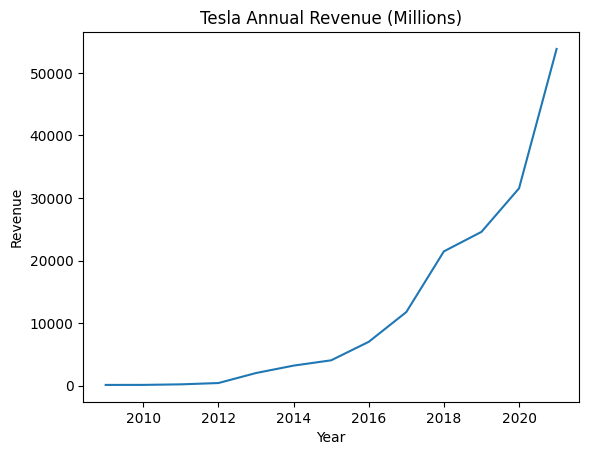

In [49]:
import matplotlib.pyplot as plt

x = df_yearly['Year']
y = df_yearly['Tesla Annual Revenue (Millions)']
plt.plot(x, y)
plt.title("Tesla Annual Revenue (Millions)")
plt.ylabel("Revenue")
plt.xlabel("Year")

In [128]:
df_quarterly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Quarter                             54 non-null     object 
 1   Tesla Quarterly Revenue (Millions)  54 non-null     float64
 2   IXIC                                54 non-null     float64
 3   CL                                  54 non-null     float64
 4   Vehicle Sales                       54 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [135]:
### to convert Quarter data and merge them 
### to find out the mean of Quarterly revenue to see whether there are seasonality characteristic

In [129]:
df_quarterly.Quarter=df_quarterly.Quarter.astype(str)

In [130]:
df_quarterly
df_quarterly['New_Quarter'] = [i.split('-') for i in df_quarterly['Quarter']]

In [131]:
df_quarterly['Processed_Quarter'] = [i[1] for i in df_quarterly['New_Quarter']]
df_quarterly

,Quarter,Tesla Quarterly Revenue (Millions),IXIC,CL,Vehicle Sales,New_Quarter,Processed_Quarter
0,2009-06-30,26.945,1731.404437,59.619160,2592695,"[2009, 06, 30]",06
1,2009-09-30,45.527,1985.246703,68.299950,2987326,"[2009, 09, 30]",09
2,2009-12-31,39.470,2162.327355,76.190606,2588408,"[2009, 12, 31]",12
3,2010-03-31,20.812,2274.819542,78.715088,2526773,"[2010, 03, 31]",03
4,2010-06-30,28.405,2343.396185,78.032428,3051409,"[2010, 06, 30]",06
5,2010-09-30,31.241,2237.967129,76.199415,2992963,"[2010, 09, 30]",09
6,2010-12-31,36.286,2534.615228,85.174235,2939271,"[2010, 12, 31]",12
7,2011-03-31,49.030,2741.011148,94.100988,3040925,"[2011, 03, 31]",03
8,2011-06-30,58.171,2766.636803,102.561268,3245694,"[2011, 06, 30]",06
9,2011-09-30,57.666,2613.111577,89.763790,3171284,"[2011, 09, 30]",09


In [133]:
df_quarterly['Processed_Quarter'] = df_quarterly['Processed_Quarter'].map({"03":1, "06":2, "09":3, "12":4})

In [138]:
df_quarterly

,Quarter,Tesla Quarterly Revenue (Millions),IXIC,CL,Vehicle Sales,New_Quarter,Processed_Quarter
0,2009-06-30,26.945,1731.404437,59.619160,2592695,"[2009, 06, 30]",2
1,2009-09-30,45.527,1985.246703,68.299950,2987326,"[2009, 09, 30]",3
2,2009-12-31,39.470,2162.327355,76.190606,2588408,"[2009, 12, 31]",4
3,2010-03-31,20.812,2274.819542,78.715088,2526773,"[2010, 03, 31]",1
4,2010-06-30,28.405,2343.396185,78.032428,3051409,"[2010, 06, 30]",2
5,2010-09-30,31.241,2237.967129,76.199415,2992963,"[2010, 09, 30]",3
6,2010-12-31,36.286,2534.615228,85.174235,2939271,"[2010, 12, 31]",4
7,2011-03-31,49.030,2741.011148,94.100988,3040925,"[2011, 03, 31]",1
8,2011-06-30,58.171,2766.636803,102.561268,3245694,"[2011, 06, 30]",2
9,2011-09-30,57.666,2613.111577,89.763790,3171284,"[2011, 09, 30]",3


In [151]:
### mean of revenue in each quarter

In [140]:
df_quarterly.groupby('Processed_Quarter')['Tesla Quarterly Revenue (Millions)'].mean()

Processed_Quarter
1    3780.407077
2    3686.388786
3    4628.327714
4    3988.759385
Name: Tesla Quarterly Revenue (Millions), dtype: float64

In [152]:
### sales share % of revenue in each quarter

In [150]:
df_quarterly.groupby('Processed_Quarter')['Tesla Quarterly Revenue (Millions)'].sum()/df_quarterly['Tesla Quarterly Revenue (Millions)'].sum()*100

Processed_Quarter
1    22.605390
2    23.738827
3    29.804526
4    23.851257
Name: Tesla Quarterly Revenue (Millions), dtype: float64

In [141]:
### we can clearly see that Q3 is the best quarter for Tesla among Q1-Q4
### there is seasonality characteristics 

In [51]:
df_monthly

,Month,Tesla Monthly Revenue (Millions),IXIC,CL,Vehicle Sales
0,2009-04-30,8.981667,1641.147618,49.949524,822746
1,2009-05-31,8.981667,1726.077496,59.212500,919295
2,2009-06-30,8.981667,1826.988198,69.695455,850654
3,2009-07-31,15.175667,1873.837735,64.293182,991950
4,2009-08-31,15.175667,1997.155244,71.138572,1254982
...,...,...,...,...,...
157,2022-05-31,5644.666667,11829.729539,109.259523,1130238
158,2022-06-30,5644.666667,11418.919085,114.154091,1091699
159,2022-07-31,7151.333333,11622.631543,99.384500,1125419
160,2022-08-31,7151.333333,12570.260403,91.482609,1136045


Text(0.5, 0, 'Month')

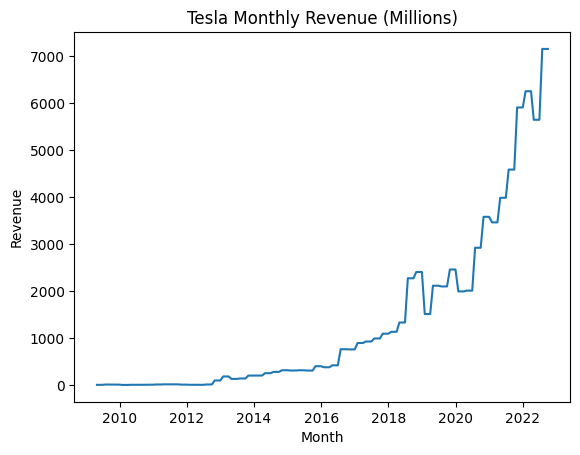

In [153]:
import matplotlib.pyplot as plt

x = df_monthly['Month']
y = df_monthly['Tesla Monthly Revenue (Millions)']
plt.plot(x, y)
plt.title("Tesla Monthly Revenue (Millions)")
plt.ylabel("Revenue")
plt.xlabel("Month")

In [179]:
df_yearly

,Year,Tesla Annual Revenue (Millions),IXIC,CL,Household Income,Family Income,Capita Income,Vehicle Sales
0,2009,111.943,1845.384962,62.094088,63573,77322,33430,10347715
1,2010,116.744,2349.893531,79.609881,62323,75477,32452,11510416
2,2011,204.242,2677.440750,95.114405,60969,74192,32243,12695712
3,2012,413.256,2965.558847,94.213520,60732,73920,32297,15376264
4,2013,2013.496,3541.292188,98.046825,60869,74593,32833,15490245
5,2014,3198.356,4375.103553,92.906786,61468,75505,33094,16424017
6,2015,4046.025,4945.553540,48.761349,63784,78061,34284,17404970
7,2016,7000.132,4987.792947,43.435800,65052,80231,35145,17500719
8,2017,11759.000,6235.298914,50.853267,66687,81669,35807,17212565
9,2018,21461.000,7425.957811,64.947450,66828,82434,36503,17323849


In [180]:
df_yearly['Tesla Annual Revenue (Millions)'].pct_change()*100

0            NaN
1       4.288790
2      74.948605
3     102.336444
4     387.227288
5      58.845908
6      26.503272
7      73.012574
8      67.982547
9      82.507016
10     14.524020
11     28.309871
12     70.671613
Name: Tesla Annual Revenue (Millions), dtype: float64

In [53]:
### from the above charts and data, we can confirm that Revenue for Tesla is keep increasing
### especially during 2011-2013, 2016-2018, 2021
### Tesla achieve over 65% year-to-year growth 
### also there are similar patterns 
### i.e. for around 2 gap years, there will be consecutive 3 years consistent boosts

In [185]:
### Bivariate Analysis on Tesla sales VS Vehicle Sales in US

In [181]:
df_yearly['Vehicle Sales'].pct_change()*100

0           NaN
1     11.236307
2     10.297595
3     21.113837
4      0.741279
5      6.028129
6      5.972674
7      0.550124
8     -1.646527
9      0.646528
10    -1.731457
11   -13.663484
12     1.748339
Name: Vehicle Sales, dtype: float64

In [196]:
import seaborn as sns

In [214]:
df_yearly.rename(columns={'Vehicle Sales':'Vehicle_Sales'}, inplace=True)
df_yearly.rename(columns={'Tesla_Annual_Revenue_(Millions)':'Tesla_Sales'}, inplace=True)

In [215]:
df_yearly

,Year,Tesla_Sales,IXIC,CL,Household Income,Family Income,Capita Income,Vehicle_Sales
0,2009,111.943,1845.384962,62.094088,63573,77322,33430,10347715
1,2010,116.744,2349.893531,79.609881,62323,75477,32452,11510416
2,2011,204.242,2677.440750,95.114405,60969,74192,32243,12695712
3,2012,413.256,2965.558847,94.213520,60732,73920,32297,15376264
4,2013,2013.496,3541.292188,98.046825,60869,74593,32833,15490245
5,2014,3198.356,4375.103553,92.906786,61468,75505,33094,16424017
6,2015,4046.025,4945.553540,48.761349,63784,78061,34284,17404970
7,2016,7000.132,4987.792947,43.435800,65052,80231,35145,17500719
8,2017,11759.000,6235.298914,50.853267,66687,81669,35807,17212565
9,2018,21461.000,7425.957811,64.947450,66828,82434,36503,17323849


In [249]:
df_yearly.to_csv('Tesla.csv')

Text(0.5, 0, 'Tesla Sales')

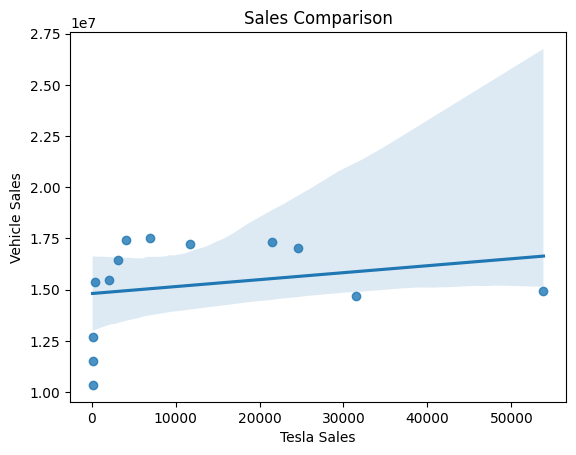

In [218]:
sns.regplot(y = df_yearly.Vehicle_Sales, x = df_yearly.Tesla_Sales)
plt.title("Sales Comparison")
plt.ylabel("Vehicle Sales")
plt.xlabel("Tesla Sales")

In [184]:
### at the same time, by comparing Vehicle Sales in US (Units)
### Tesla perform far better if we look at year-to-year growth
### especially during COVID 2019-2020, general car industry face negative growth
### while Tesla remains it's growth power with outstanding performance

In [219]:
### Multivariate Analysis on Tesla sales

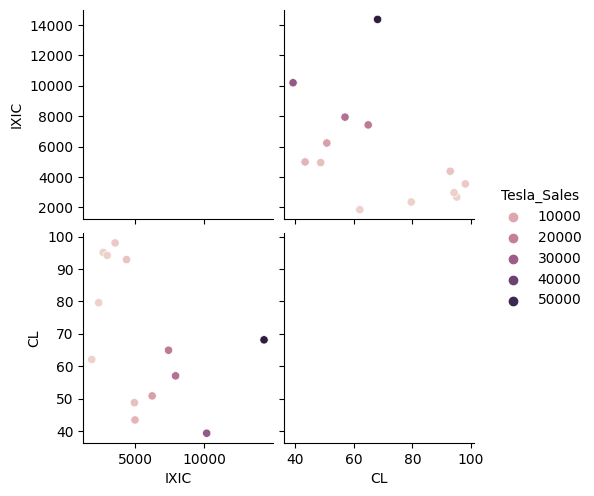

In [227]:
sns.pairplot(data=df_yearly[['IXIC','CL','Tesla_Sales']],hue='Tesla_Sales')

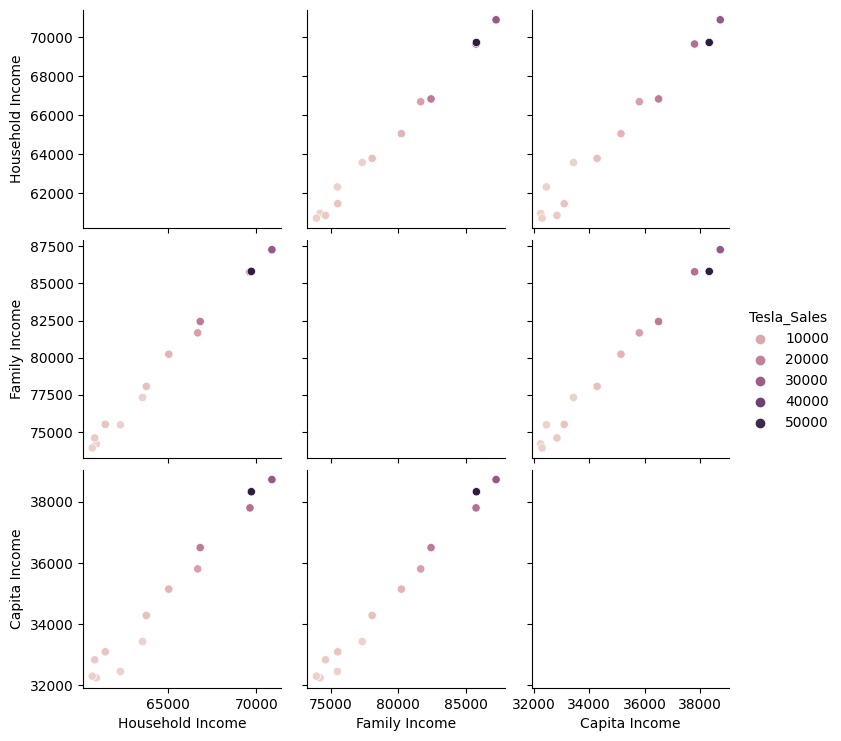

In [224]:
sns.pairplot(data=df_yearly[['Household Income','Family Income','Capita Income','Tesla_Sales']],hue='Tesla_Sales')

In [228]:
### To find the correlation among Tesla Sales and other variables

In [234]:
corr = df_yearly.corr()
corr

,Year,Tesla_Sales,IXIC,CL,Household Income,Family Income,Capita Income,Vehicle_Sales
Year,1.000000,0.869342,0.925154,-0.557649,0.869760,0.895783,0.930511,0.643425
Tesla_Sales,0.869342,1.000000,0.984533,-0.400908,0.864113,0.868046,0.895789,0.234085
IXIC,0.925154,0.984533,1.000000,-0.444205,0.860947,0.871690,0.906840,0.363780
CL,-0.557649,-0.400908,-0.444205,1.000000,-0.744998,-0.740346,-0.700639,-0.307347
Household Income,0.869760,0.864113,0.860947,-0.744998,1.000000,0.997238,0.986578,0.287756
Family Income,0.895783,0.868046,0.871690,-0.740346,0.997238,1.000000,0.994414,0.341577
Capita Income,0.930511,0.895789,0.906840,-0.700639,0.986578,0.994414,1.000000,0.391462
Vehicle_Sales,0.643425,0.234085,0.363780,-0.307347,0.287756,0.341577,0.391462,1.000000


<AxesSubplot:>

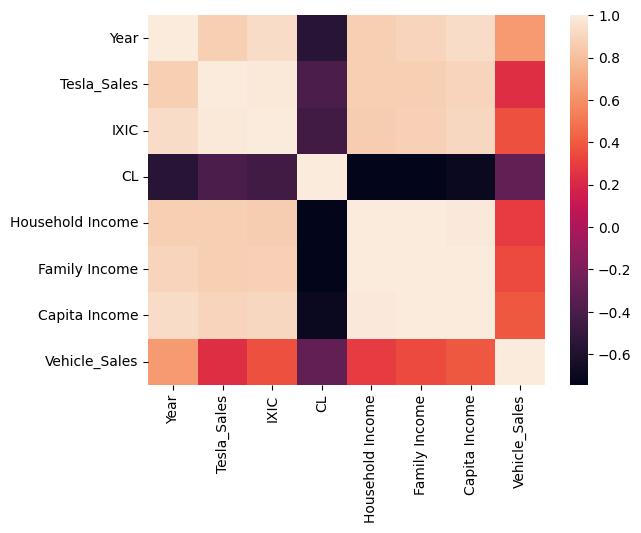

In [235]:
sns.heatmap(corr)

In [237]:
### as the above chart & heatmap show
### Tesla sales are correlated with most of the variables except 'CL' and 'Vehicle Sales'

In [232]:
### We shall illustrate 2 outstanding variables in graphs

<AxesSubplot:xlabel='Tesla_Sales', ylabel='CL'>

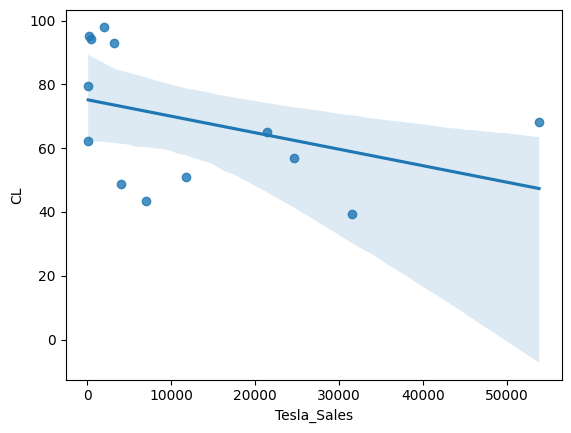

In [246]:
### CL with correlation -0.400
sns.regplot(y = df_yearly.CL, x = df_yearly.Tesla_Sales)

<AxesSubplot:xlabel='Tesla_Sales', ylabel='Vehicle_Sales'>

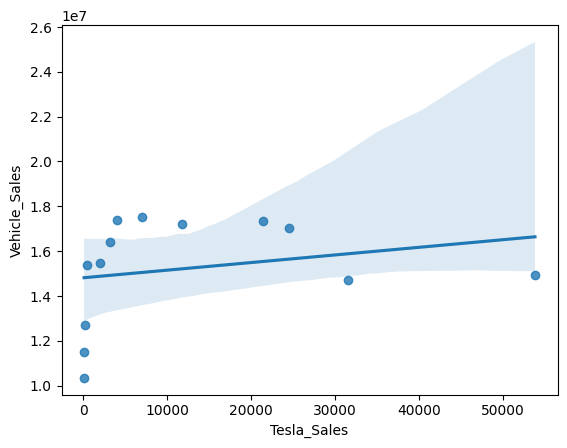

In [247]:
### Vehicle Sales with correlation 0.234
sns.regplot(y = df_yearly.Vehicle_Sales, x = df_yearly.Tesla_Sales)